# Importing dependencies

In [1]:
# Importing the necessary libraries
import math
import matplotlib.pyplot as plt
import numpy as np

# Function definitions

In [2]:
# Defining a function that will generate pseudo random numbers with the specified generator
def pseudo_random_uniform(seed, size):
    values = []
    for i in range(size):
        x_next = (7**5)*seed % ((2**31) - 1)
        random_value = x_next/((2**31) - 1)
        values.append(random_value)
        seed = x_next
    return values

In [3]:
# Defining a function that will give the value of the sample distribution function at each random number generated
def sample_distribution(values, size):
    ordered = values
    ordered.sort()
    S = []
    for i in range(size):
        if(i < (size - 1)):
            if(values[i] < ordered[0]):
                S.append(0)
            elif(ordered[i] <= values[i] and values[i] < ordered[i+1]):
                S.append(i/size)
            elif(ordered[(size - 1)] <= values[i]):
                S.append(1)
        if(i == (size - 1)):
            if(values[i] < ordered[0]):
                S.append(0)
            elif(ordered[i] <= values[i]):
                S.append(i/size)
            elif(ordered[(size - 1)] <= values[i]):
                S.append(1)
    return S

In [4]:
# Defining a function that will perform the Kolmogorov and Smirnov test
def kolmogorov_smirnov(values, S, size):
    test_value = 1.6276/math.sqrt(size)
    diff = []
    for i in range(size):
        diff.append(abs(S[i] - values[i]))
    test_param = max(diff)
    
    print("The test parameter is: " + str(test_param))
    print("The test value is: " + str(test_value))
    
    if(test_param < test_value):
        print("This distribution passes the Kolmogorov and Smirnov Test")
    else:
        print("The test failed")
        

# Testing on One Sample

In [5]:
# Running the test
values = pseudo_random_uniform(1, 1000)
S = sample_distribution(values, 1000)
kolmogorov_smirnov(values, S, 1000)

The test parameter is: 0.02796970616465888
The test value is: 0.05146923119690054
This distribution passes the Kolmogorov and Smirnov Test


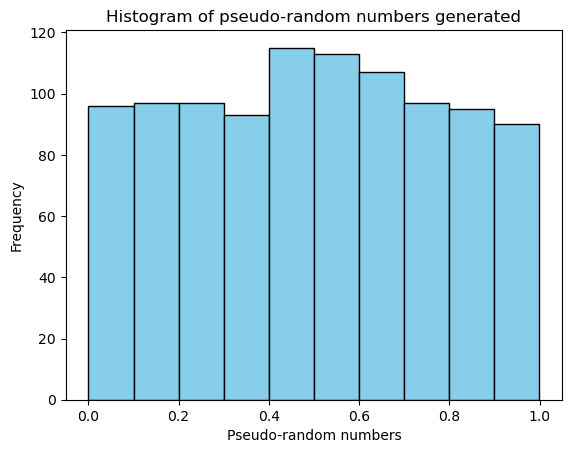

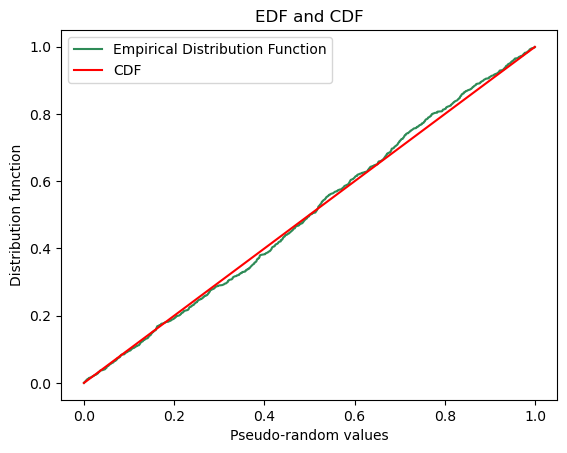

In [6]:
# Plotting the pseudo-random numbers generated and the sample distribution function to visualize the shape
plt.figure(1)
plt.hist(values, color='skyblue', edgecolor='black')
# Adding title, x label, and y label
plt.title('Histogram of pseudo-random numbers generated')
plt.xlabel('Pseudo-random numbers')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between the sampling distribution function and the random numbers generated
plt.figure(2)
plt.plot(values, S, color='seagreen', label='Empirical Distribution Function')
plt.plot(values, values, color='red', label='CDF')
plt.legend()
# Adding title, x label, and y label
plt.title('EDF and CDF')
plt.xlabel('Pseudo-random values')
plt.ylabel('Distribution function')
plt.show()

In [7]:
# Using Monte-Carlo technique to approximate the expected value of our distribution
mean = sum(values)/1000
print("The estimated mean of the distribution is: " + str(mean))

# Using Monte-Carlo technique to approximate the variance of our distribution
values_sq = []
for i in range(len(values)):
    values_sq.append(values[i]**2)    
variance = sum(values_sq)/1000 - mean**2
print("The estimated variance of the distribution is: " + str(variance))

# Calculating the approximate standard deviation of our distribution
std_dev = math.sqrt(variance)
print("The estimated standard deviation of the distribution is: " + str(std_dev))

The estimated mean of the distribution is: 0.4979613793538705
The estimated variance of the distribution is: 0.07874879765754572
The estimated standard deviation of the distribution is: 0.28062216173628507


# Testing on Multiple Samples

In [8]:
# Defining a function that will perform the Kolmogorov and Smirnov test with suppressed output unless failed
def ks_suppressed(values, S, size):
    test_value = 1.6276/math.sqrt(size)
    diff = []
    for i in range(size):
        diff.append(abs(S[i] - values[i]))
    test_param = max(diff)
    
    if(test_param < test_value):
        return 1
    else:
        print("The test failed")
        print("The test parameter is: " + str(test_param))
        print("The test value is: " + str(test_value))
        return 0
        

In [9]:
def generator_test(num_trials):
    # Generating multiple seeds to see if we still pass the test
    starting_values = []
    for i in range(0,num_trials):
        starting_values.append(i)

    # Running the test for each starting value and evaluating if it passes the test
    total_pass = 0
    for i in range(len(starting_values)):
        seed = starting_values[i]
        # Running the test
        values = pseudo_random_uniform(seed, 1000)
        S = sample_distribution(values, 1000)
        passed = ks_suppressed(values, S, 1000)

        if(passed == 1):
            total_pass += 1
        else:
            print("The seed that produced failing results: " + str(seed))
            
            print("For the pseudo-random numbers, the lower bound is " + str(min(values)) + " the upper bound is " + str(max(values)))
            
            # Using Monte-Carlo technique to approximate the expected value of our distribution
            mean = sum(values)/1000
            print("The estimated mean of the distribution is: " + str(mean))

            # Using Monte-Carlo technique to approximate the variance of our distribution
            values_sq = []
            for i in range(len(values)):
                values_sq.append(values[i]**2)    
            variance = sum(values_sq)/1000 - mean**2
            print("The estimated variance of the distribution is: " + str(variance))

            # Calculating the approximate standard deviation of our distribution
            std_dev = math.sqrt(variance)
            print("The estimated standard deviation of the distribution is: " + str(std_dev))
            
            # Plotting the pseudo-random numbers generated and the sample distribution function to visualize the shape
            plt.figure(1)
            plt.hist(values, color='skyblue', edgecolor='black')
            # Adding title, x label, and y label
            plt.title('Histogram of pseudo-random numbers generated')
            plt.xlabel('Pseudo-random numbers')
            plt.ylabel('Frequency')
            plt.show()

            # Plotting the relationship between the sampling distribution function and the random numbers generated
            plt.figure(2)
            plt.plot(values, S, color='seagreen', label='Empirical Distribution Function')
            plt.plot(values, values, color='red', label='CDF')
            plt.legend()
            # Adding title, x label, and y label
            plt.title('EDF and CDF')
            plt.xlabel('Pseudo-random values')
            plt.ylabel('Distribution function')
            plt.show()

    print("The generator passes the test " + str(total_pass/len(starting_values)*100) + "% of the time with " + str(num_trials) + " different seeds.")
    
    

The test failed
The test parameter is: 1.0
The test value is: 0.05146923119690054
The seed that produced failing results: 0
For the pseudo-random numbers, the lower bound is 0.0 the upper bound is 0.0
The estimated mean of the distribution is: 0.0
The estimated variance of the distribution is: 0.0
The estimated standard deviation of the distribution is: 0.0


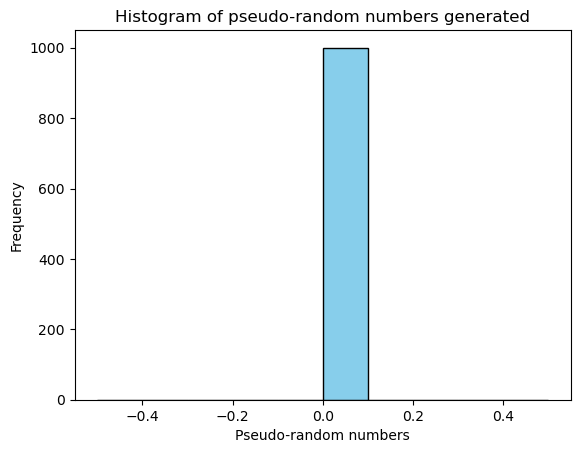

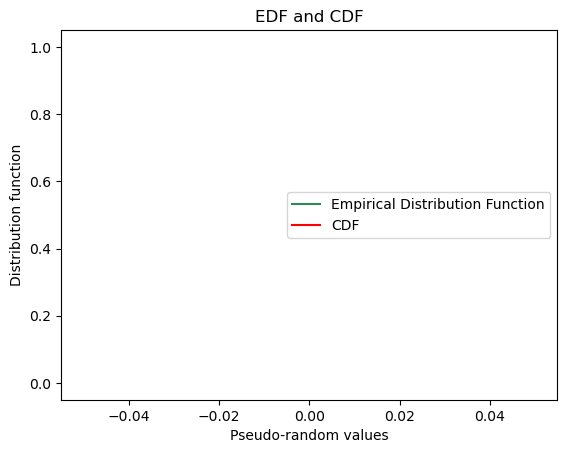

The test failed
The test parameter is: 0.05850634546974043
The test value is: 0.05146923119690054
The seed that produced failing results: 256
For the pseudo-random numbers, the lower bound is 0.0010625985455990762 the upper bound is 0.9996327063998359
The estimated mean of the distribution is: 0.5231131145908093
The estimated variance of the distribution is: 0.0820583450296381
The estimated standard deviation of the distribution is: 0.28645827799112056


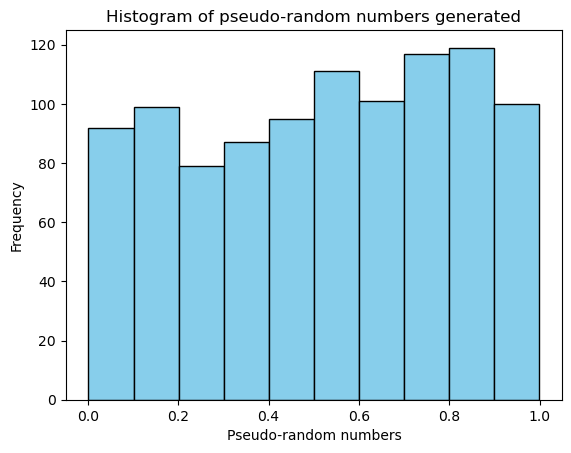

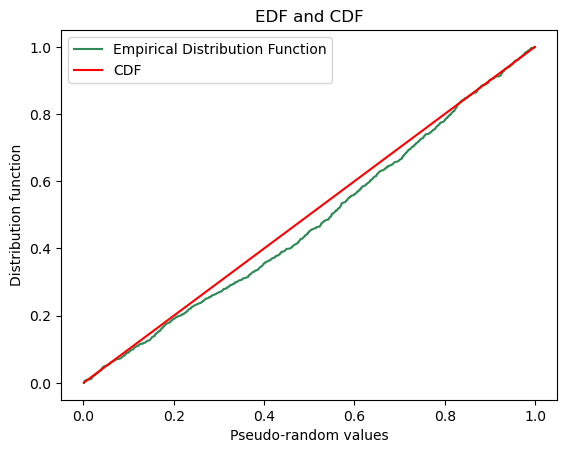

The test failed
The test parameter is: 0.0531549992855429
The test value is: 0.05146923119690054
The seed that produced failing results: 366
For the pseudo-random numbers, the lower bound is 0.0012143375357679732 the upper bound is 0.999609091784623
The estimated mean of the distribution is: 0.4798648435165477
The estimated variance of the distribution is: 0.08021696178315366
The estimated standard deviation of the distribution is: 0.2832259906561431


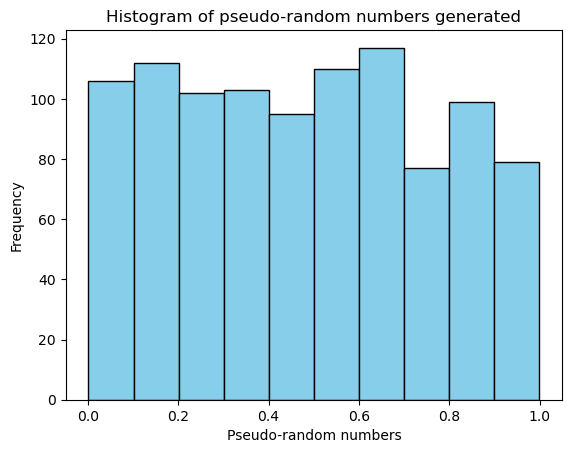

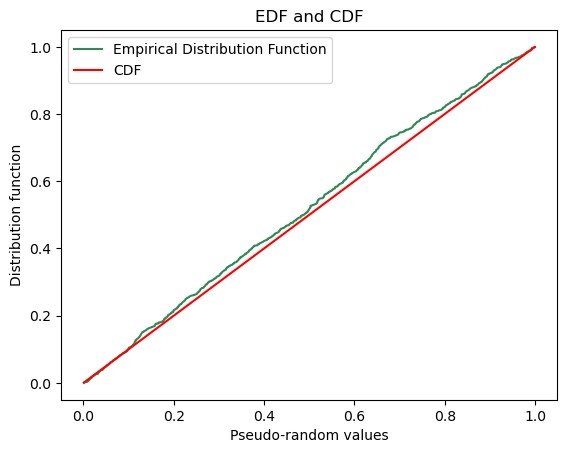

The test failed
The test parameter is: 0.05551308081881745
The test value is: 0.05146923119690054
The seed that produced failing results: 401
For the pseudo-random numbers, the lower bound is 0.0007768748331707319 the upper bound is 0.9998202007263062
The estimated mean of the distribution is: 0.4665131209020096
The estimated variance of the distribution is: 0.08154534697469637
The estimated standard deviation of the distribution is: 0.28556145918995507


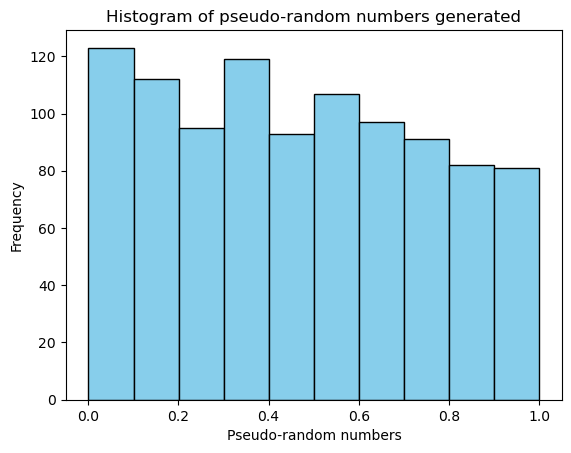

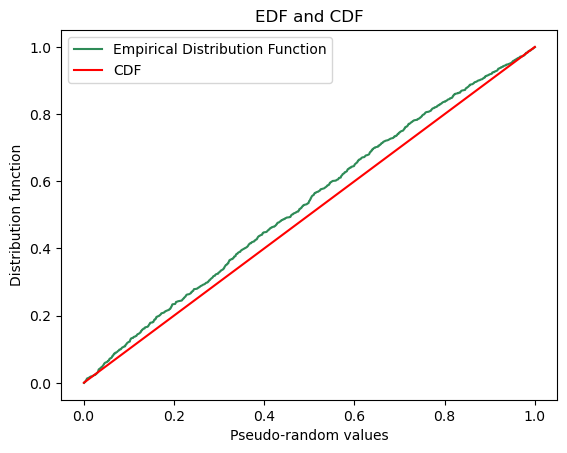

The test failed
The test parameter is: 0.06911511918209262
The test value is: 0.05146923119690054
The seed that produced failing results: 577
For the pseudo-random numbers, the lower bound is 0.0014562052681372525 the upper bound is 0.999773803632601
The estimated mean of the distribution is: 0.5317158871831908
The estimated variance of the distribution is: 0.08074227053832228
The estimated standard deviation of the distribution is: 0.28415184415787675


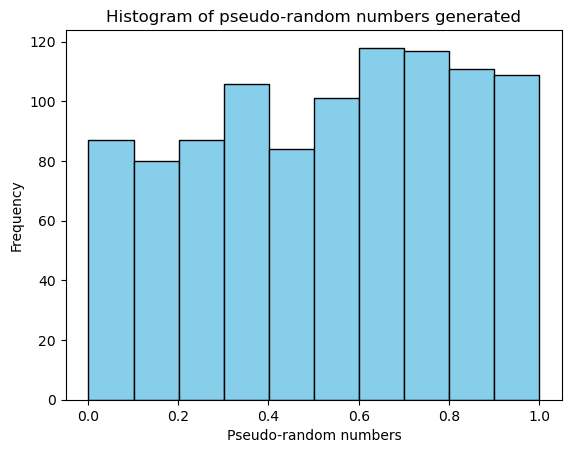

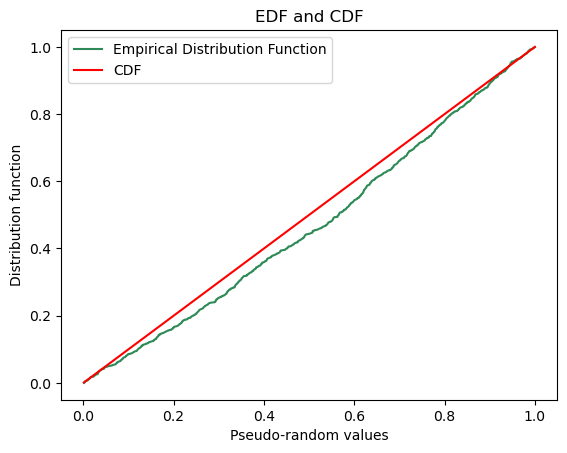

The test failed
The test parameter is: 0.053291065734481
The test value is: 0.05146923119690054
The seed that produced failing results: 598
For the pseudo-random numbers, the lower bound is 0.0007667220201188335 the upper bound is 0.99788354383683
The estimated mean of the distribution is: 0.5289048536144684
The estimated variance of the distribution is: 0.08171809114882228
The estimated standard deviation of the distribution is: 0.28586376326638935


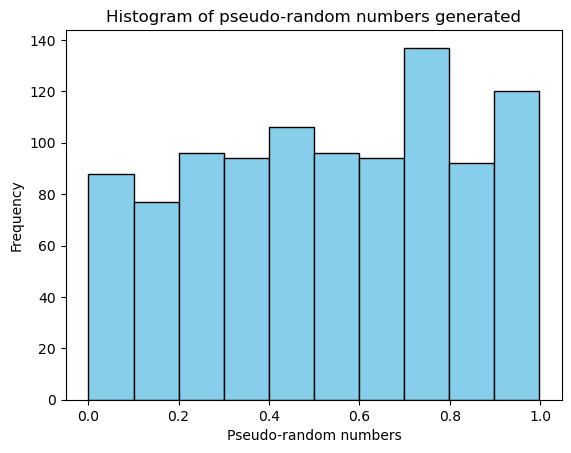

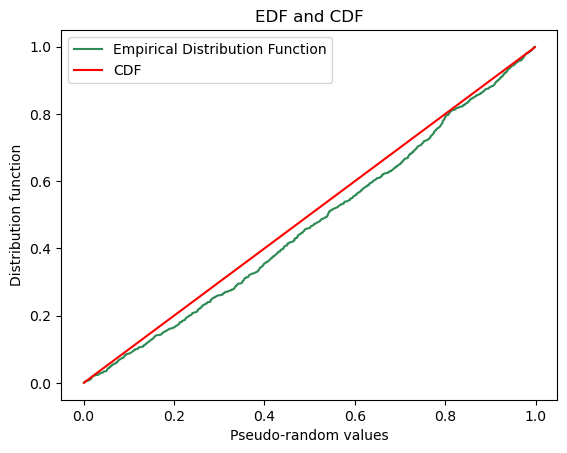

The test failed
The test parameter is: 0.05274489378172198
The test value is: 0.05146923119690054
The seed that produced failing results: 931
For the pseudo-random numbers, the lower bound is 0.0008551981304097912 the upper bound is 0.9984027761958553
The estimated mean of the distribution is: 0.5190441784532944
The estimated variance of the distribution is: 0.08689703926850334
The estimated standard deviation of the distribution is: 0.2947830376200492


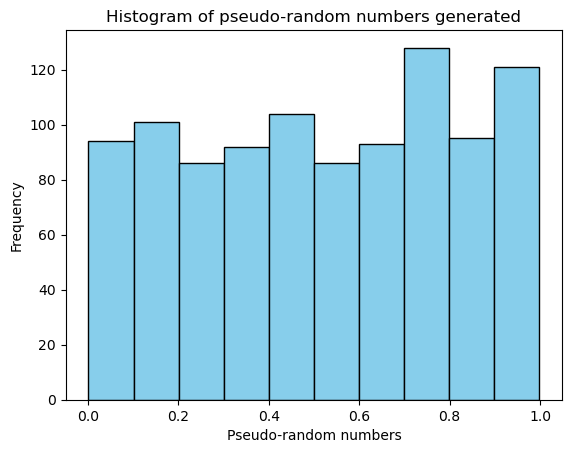

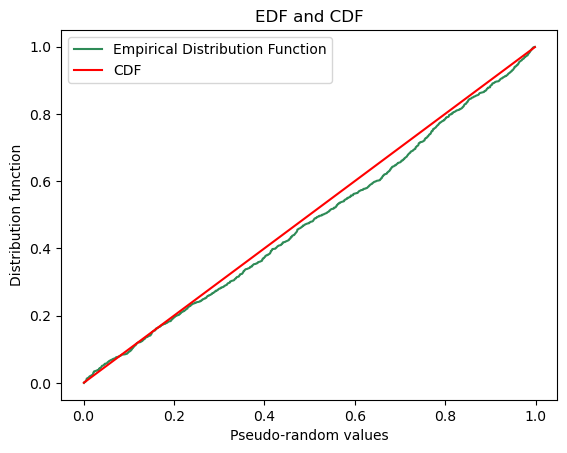

The generator passes the test 99.3% of the time with 1000 different seeds.


In [10]:
generator_test(1000)